# 1. Linear Regression

## 1.1 Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.1.1 Read CSV

In [2]:
df=pd.read_csv(r"C:\Users\VIKNESHAK\OneDrive\Desktop\Data Science\Projects\ML-Algorithms-main\Linear Regression\tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


## Renaming the TV column to budget

In [3]:
df=df.rename(columns={'TV':'Marketing Budget'})

In [4]:
df.head()

,Marketing Budget,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marketing Budget  200 non-null    float64
 1   Sales             200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


## descriptive summary of the data

In [6]:
df.describe()

,Marketing Budget,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## duplicate values

In [7]:
df.duplicated().sum()

0

## null values

In [8]:
df.isna().sum()

Marketing Budget    0
Sales               0
dtype: int64

## Visualizing the data

## Scatter plot

Text(0.5, 1.0, 'Marketing Budget VS Sales')

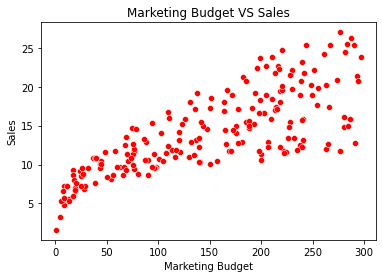

In [9]:
sns.scatterplot(x=df['Marketing Budget'],y=df['Sales'],color='r')
plt.title('Marketing Budget VS Sales')

### Observation

The data is Linear

## Outliers

<AxesSubplot:xlabel='Marketing Budget'>

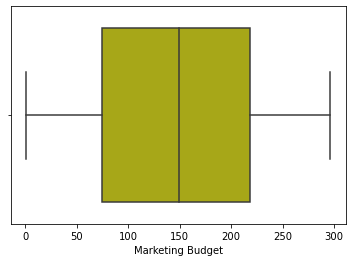

In [10]:
sns.boxplot(df['Marketing Budget'],color='y')

<AxesSubplot:xlabel='Sales'>

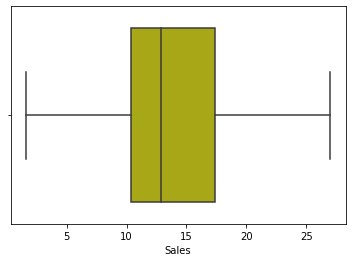

In [11]:
sns.boxplot(df['Sales'],color='y')

### Observation

The data has no outliers

## Data Distribution Type

<AxesSubplot:xlabel='Marketing Budget', ylabel='Count'>

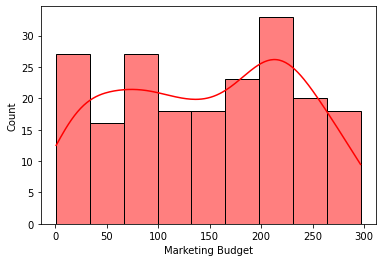

In [12]:
sns.histplot(df['Marketing Budget'],color='r',kde=True)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

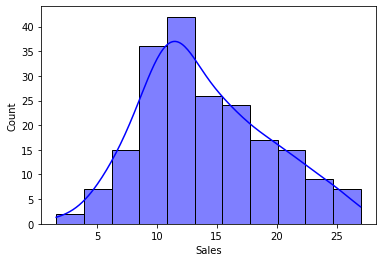

In [13]:
sns.histplot(df['Sales'],color='b',kde=True)

### Observation

Marketing Budgert is nearly equal for all the budget except 3 points

Sales is almost normally distributed

## Standardizing the data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [15]:
df['MB_Scaled']=scaler.fit_transform(df[['Marketing Budget']])

In [16]:
df

,Marketing Budget,Sales,MB_Scaled
0,230.1,22.1,0.775786
1,44.5,10.4,0.148123
2,17.2,9.3,0.055800
3,151.5,18.5,0.509976
4,180.8,12.9,0.609063
...,...,...,...
195,38.2,7.6,0.126818
196,94.2,9.7,0.316199
197,177.0,12.8,0.596212
198,283.6,25.5,0.956713


## Scatter plot using new data

<AxesSubplot:xlabel='MB_Scaled', ylabel='Sales'>

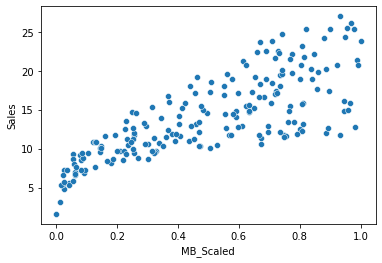

In [17]:
sns.scatterplot(x=df['MB_Scaled'],y=df['Sales'])

## Building the Model

### Split the data

In [18]:
x=df[['MB_Scaled']]
y=df['Sales']

In [19]:
x

,MB_Scaled
0,0.775786
1,0.148123
2,0.055800
3,0.509976
4,0.609063
...,...
195,0.126818
196,0.316199
197,0.596212
198,0.956713


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [21]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

## Importing Model

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

## Fit the data into the model

In [23]:
model.fit(x_train,y_train)

LinearRegression()

## Predicting the x_test values

In [24]:
y_pred=model.predict(x_test)
y_pred

array([ 8.51837668,  7.22381284, 10.81982352,  8.37917627,  8.35133619,
       18.40624607, 18.24384558, 17.29264276, 19.51520936, 16.58736066,
       17.78448422, 13.58991175, 11.16782456, 10.6759831 , 17.23232258,
       12.80574942, 10.25838185, 16.42032017, 14.02607305,  8.96381801,
        8.05901532,  7.44189349, 10.9126238 , 17.84016438,  7.98941511,
       13.02383007, 10.36510217, 15.90527863, 18.3180858 , 11.56222573,
        8.02189521,  9.4324594 , 13.51103152,  7.38157331, 14.22095363,
       11.35342511, 17.18592244, 20.67985282,  7.59037393, 10.46718247])

## Checking the cost function metrics

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [26]:
mse,mae,rmse

(9.946782665159708, 2.468563964871721, 3.153852036028277)

## Checking the accuracy of the model

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2=r2_score(y_test,y_pred)
r2

0.6714099367000305

## Adjusted r2

In [29]:
ar2=1-((1-r2)*(len(y)-1))/((len(y-1)-len(df.columns)-1))
ar2

0.6663804969556433

## Check the Slope and intercept

In [30]:
slope=model.coef_
slope

array([13.72052077])

In [31]:
intercept=model.intercept_
intercept

7.223812837050727

## Results

## Actual points vs best fit line points

Text(0.5, 1.0, 'Actual points vs Predicted points')

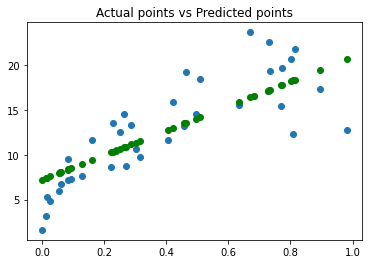

In [39]:
plt.scatter(x_test,y_test)
# plt.plot(x_test,y_pred)
plt.scatter(x_test,y_pred,color='g')
plt.title('Actual points vs Predicted points')

## SS Residual vs SS Total

In [40]:
y_test=pd.DataFrame(y_test,columns=['Sales'])

In [43]:
y_test['Mean']=y_test['Sales'].mean()
y_test.head()

,Sales,Mean
91,7.3,12.73
130,1.6,12.73
114,14.6,12.73
136,9.5,12.73
106,7.2,12.73


Text(0.5, 1.0, 'SS Residuals vs SS Total')

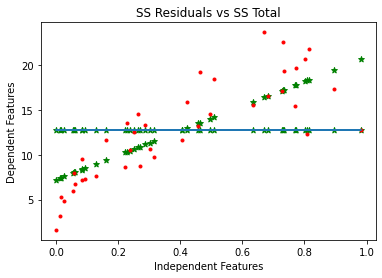

In [54]:
plt.plot(x_test["MB_Scaled"],y_test["Mean"])
# plt.plot(x_test,y_pred)
plt.scatter(x_test,y_pred,c="g",marker="*")
plt.scatter(x_test["MB_Scaled"],y_test["Mean"],c="g",marker="*")
plt.scatter(x_test["MB_Scaled"],y_test["Sales"],c="r",marker=".")
plt.xlabel("Independent Features")
plt.ylabel("Dependent Features")
plt.title("SS Residuals vs SS Total")
